In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/block4g.dat', delim_whitespace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
overhead     126 non-null float64
command      126 non-null object
sharedobj    126 non-null object
function     126 non-null object
dtypes: float64(1), object(3)
memory usage: 4.0+ KB


In [4]:
df.head(10)

,overhead,command,sharedobj,function
0,16.09,mysqld,mysqld,bin2decimal
1,9.54,mysqld,mysqld,decimal2bin
2,6.87,mysqld,mysqld,do_add
3,5.20,mysqld,mysqld,decimal_m.l
4,3.83,mysqld,mysqld,decimal_act.al_fraction
5,2.88,mysqld,mysqld,Item_s.m_s.m::.pdate_field
6,7.26,mysqld,ha_rocksdb.so,rocksdb::LRUHandleTable::Resize
7,3.56,mysqld,ha_rocksdb.so,myrocks::ha_rocksdb::convert_record_from_stora...
8,3.01,mysqld,ha_rocksdb.so,rocksdb::BlockIter::BinarySeek
9,2.82,mysqld,ha_rocksdb.so,rocksdb::BlockIter::ParseNextKey


In [5]:
funcs_counts = df.function.value_counts()
funcs_counts

rocksdb::BlockIter::ParseNextKey                           20
myrocks::ha_rocksdb::convert_record_from_storage_format    14
rocksdb::BlockIter::BinarySeek                             12
myrocks::Rdb_pk_comparator::Compare                        10
rocksdb::DBIter::FindNextUserEntryInternal                  8
rocksdb::BlockIter::Seek                                    7
rocksdb::LRUHandleTable::FindPointer                        7
rocksdb::Version::Get                                       6
myrocks::Rdb_key_def::.npack_record                         5
rocksdb::MergingIterator::Next                              5
handler::ha_rnd_next                                        4
rocksdb::DBIter::Next                                       4
_init                                                       3
rocksdb::MergingIterator::val.e                             3
pack_time                                                   3
bin2decimal                                                 2
rocksdb:

In [6]:
#funcs_counts.index
# in the decending sequence of function counts

In [7]:
tmp = df.groupby(['function'])
# print type(tmp)
# pandas.core.groupby.generic.DataFrameGroupBy
group_value = tmp.groups
# type(group_value)
# dict: key:value

In [8]:
overHeadMedian = []
for key in funcs_counts.index:
    #print(df.iloc[group_value[key]]['overhead'].mean())
    print(key, (df.iloc[group_value[key]]['overhead']).median())
    #print(df.iloc[group_value[key]]['overhead'])
    overHeadMedian.append((df.iloc[group_value[key]]['overhead']).median())
#print(funcs_counts.index, overHeadMedian)
    
dfOverheadMedian = pd.DataFrame({'function': funcs_counts.index, 'overheadMedian': overHeadMedian})



rocksdb::BlockIter::ParseNextKey 7.7
myrocks::ha_rocksdb::convert_record_from_storage_format 4.4350000000000005
rocksdb::BlockIter::BinarySeek 11.04
myrocks::Rdb_pk_comparator::Compare 3.105
rocksdb::DBIter::FindNextUserEntryInternal 3.79
rocksdb::BlockIter::Seek 2.5
rocksdb::LRUHandleTable::FindPointer 2.97
rocksdb::Version::Get 2.5300000000000002
myrocks::Rdb_key_def::.npack_record 2.75
rocksdb::MergingIterator::Next 3.34
handler::ha_rnd_next 3.56
rocksdb::DBIter::Next 4.13
_init 1.94
rocksdb::MergingIterator::val.e 3.62
pack_time 2.94
bin2decimal 9.48
rocksdb::StatisticsImpl::recordTick 1.955
decimal_m.l 5.2
decimal2bin 9.54
do_add 6.87
rocksdb::LRUHandleTable::Resize 7.26
Arg_comparator::compare_int_signed 3.72
Arg_comparator::compare_string 2.82
Item_s.m_s.m::.pdate_field 2.88
my_lengthsp_8bit 3.18
my_hash_sort_simple_nopad 2.31
myrocks::Rdb_key_def::.npack_integer 3.42
decimal_act.al_fraction 3.83


Text(0.5, 1.08, 'Counts of Top Six Functions in TPCH Queries')

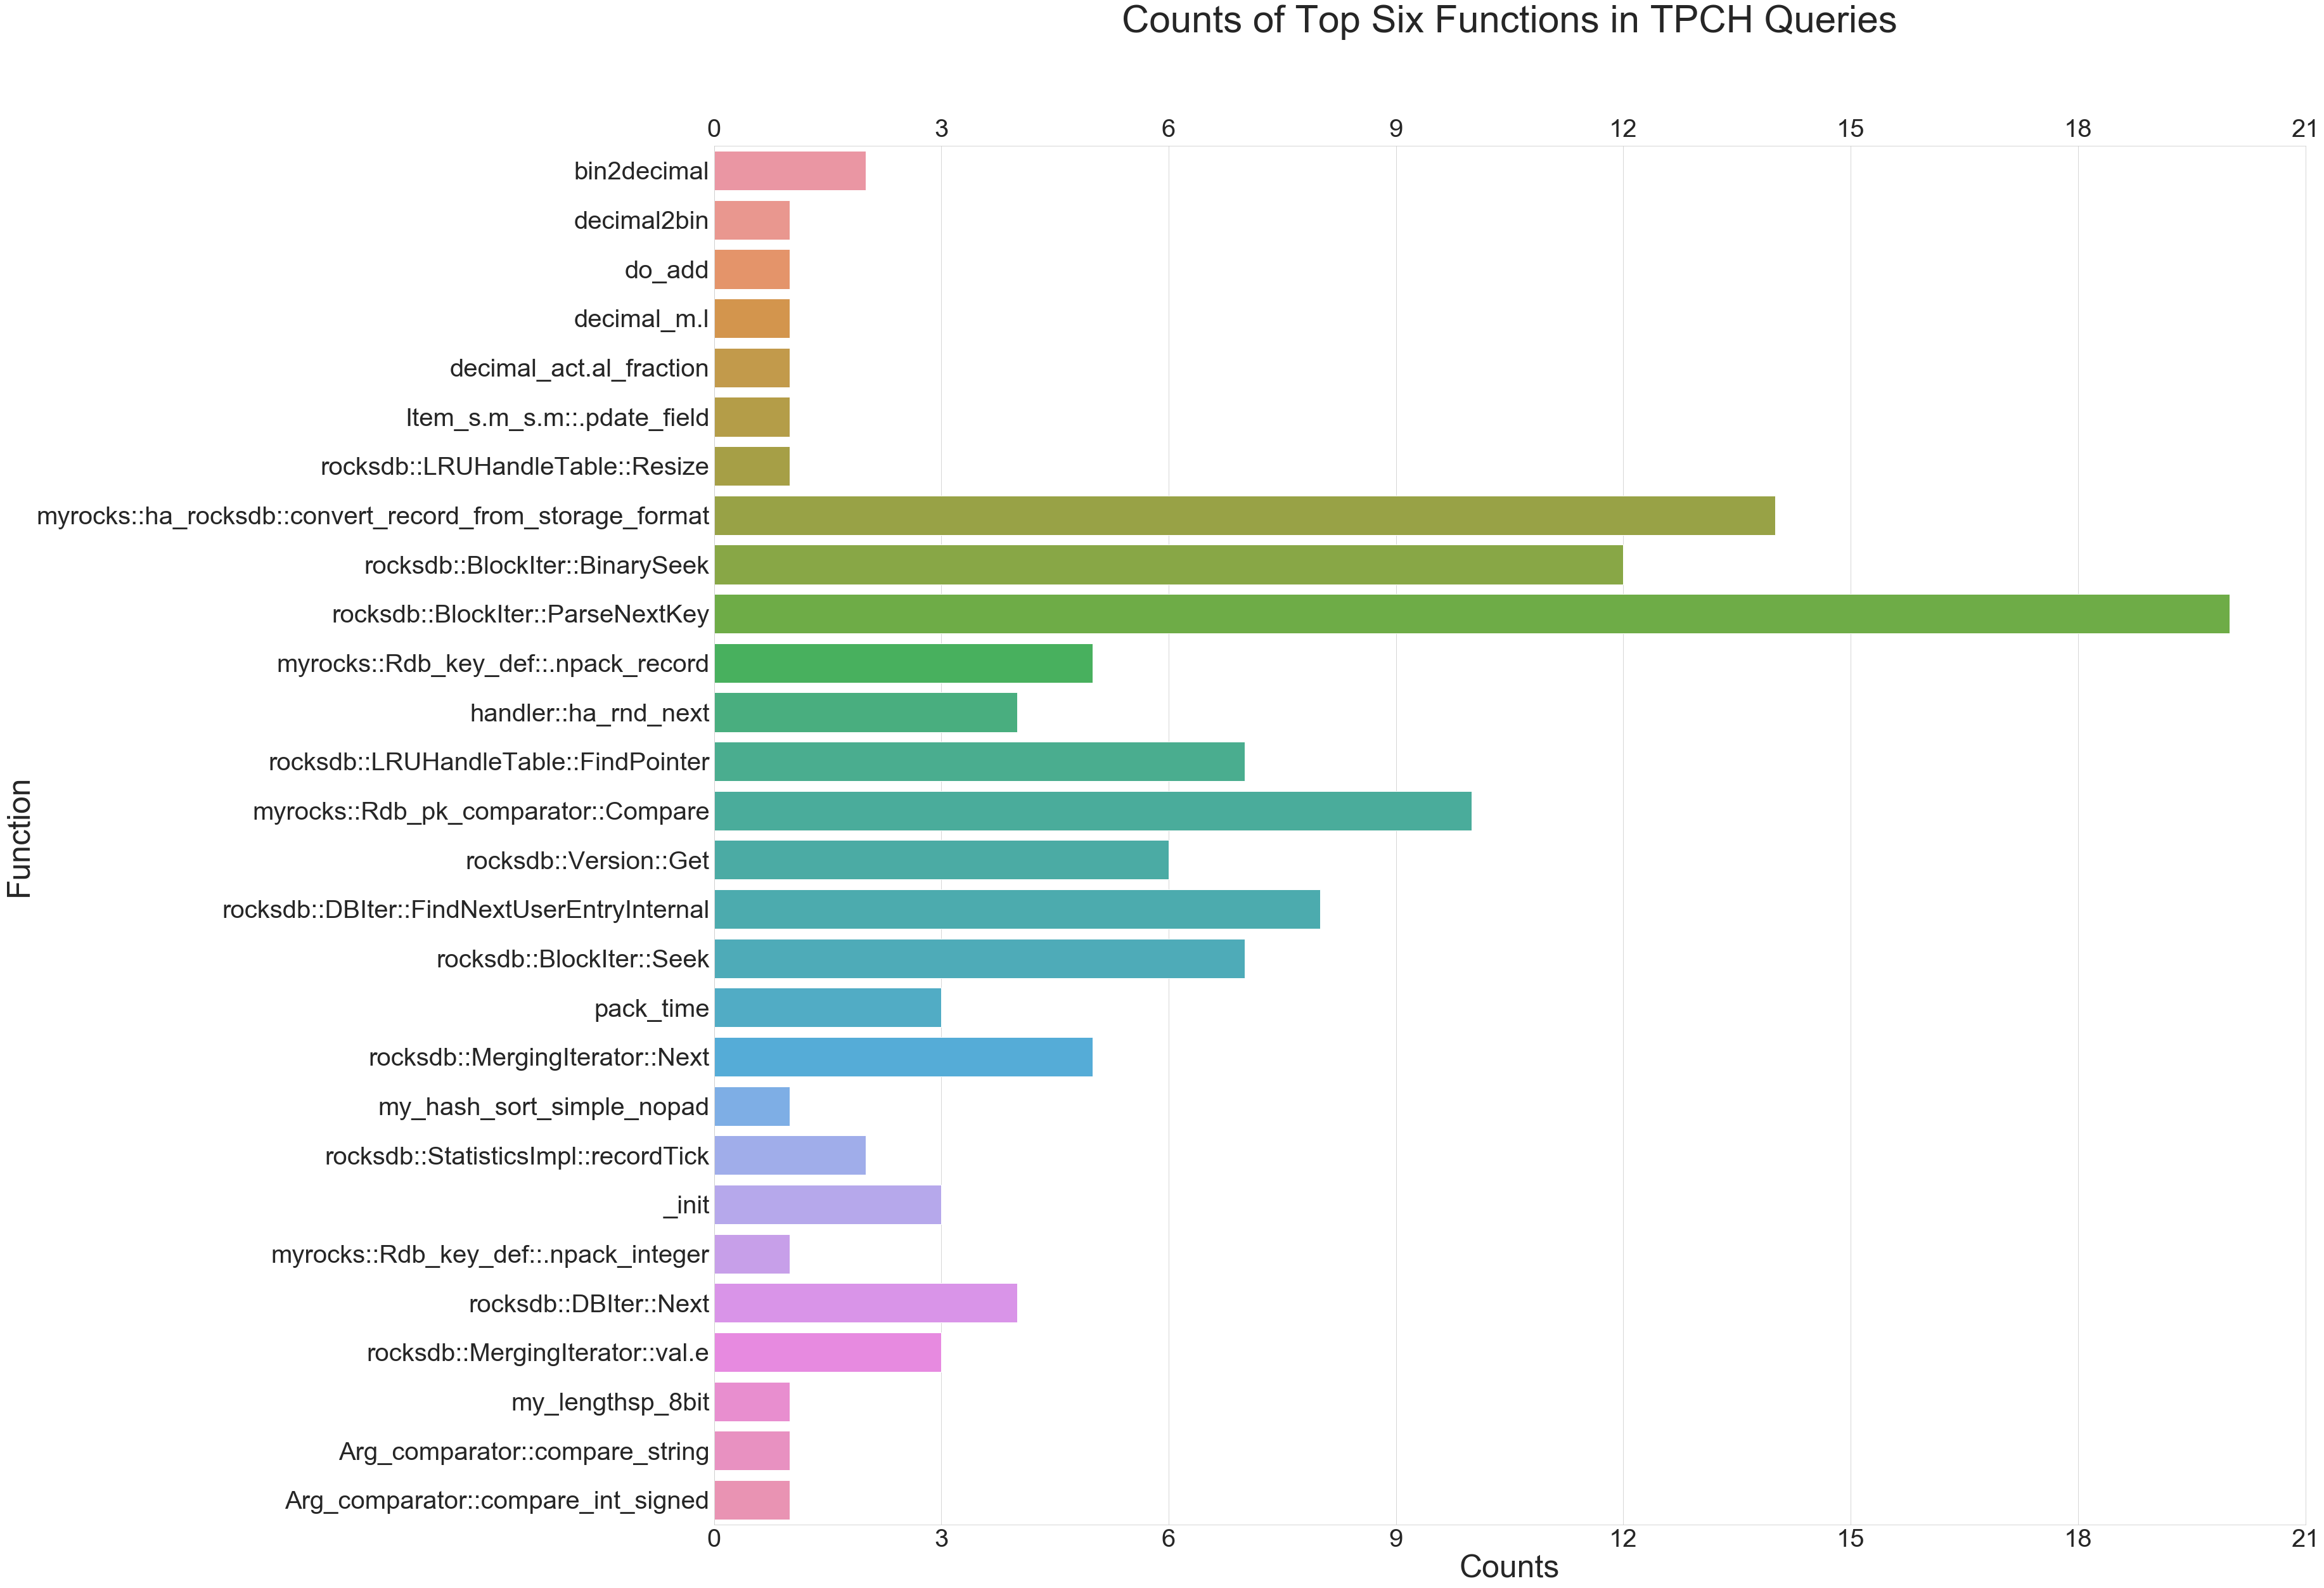

In [9]:
from matplotlib.ticker import MaxNLocator

#ax = plt.figure().gca()
plt.figure(figsize=(45,40))

ax = sns.countplot(y="function", data=df)


ax.set_xlabel(xlabel='Counts',fontsize=50)
ax.set_ylabel(ylabel='Function',fontsize=50)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.tick_params(axis='both', which='major', labelsize=40,labeltop=True)

ax.set_title('Counts of Top Six Functions in TPCH Queries', fontsize=60, y =1.08)

In [11]:
df['group_median'] = 0

df['group_median'] = df['function'].map(lambda x: dfOverheadMedian['overheadMedian'].loc[dfOverheadMedian['function'] == x].values[0])


Text(0.5, 1.05, 'Overhead Distribution of Top Six Functions in TPCH Queries')

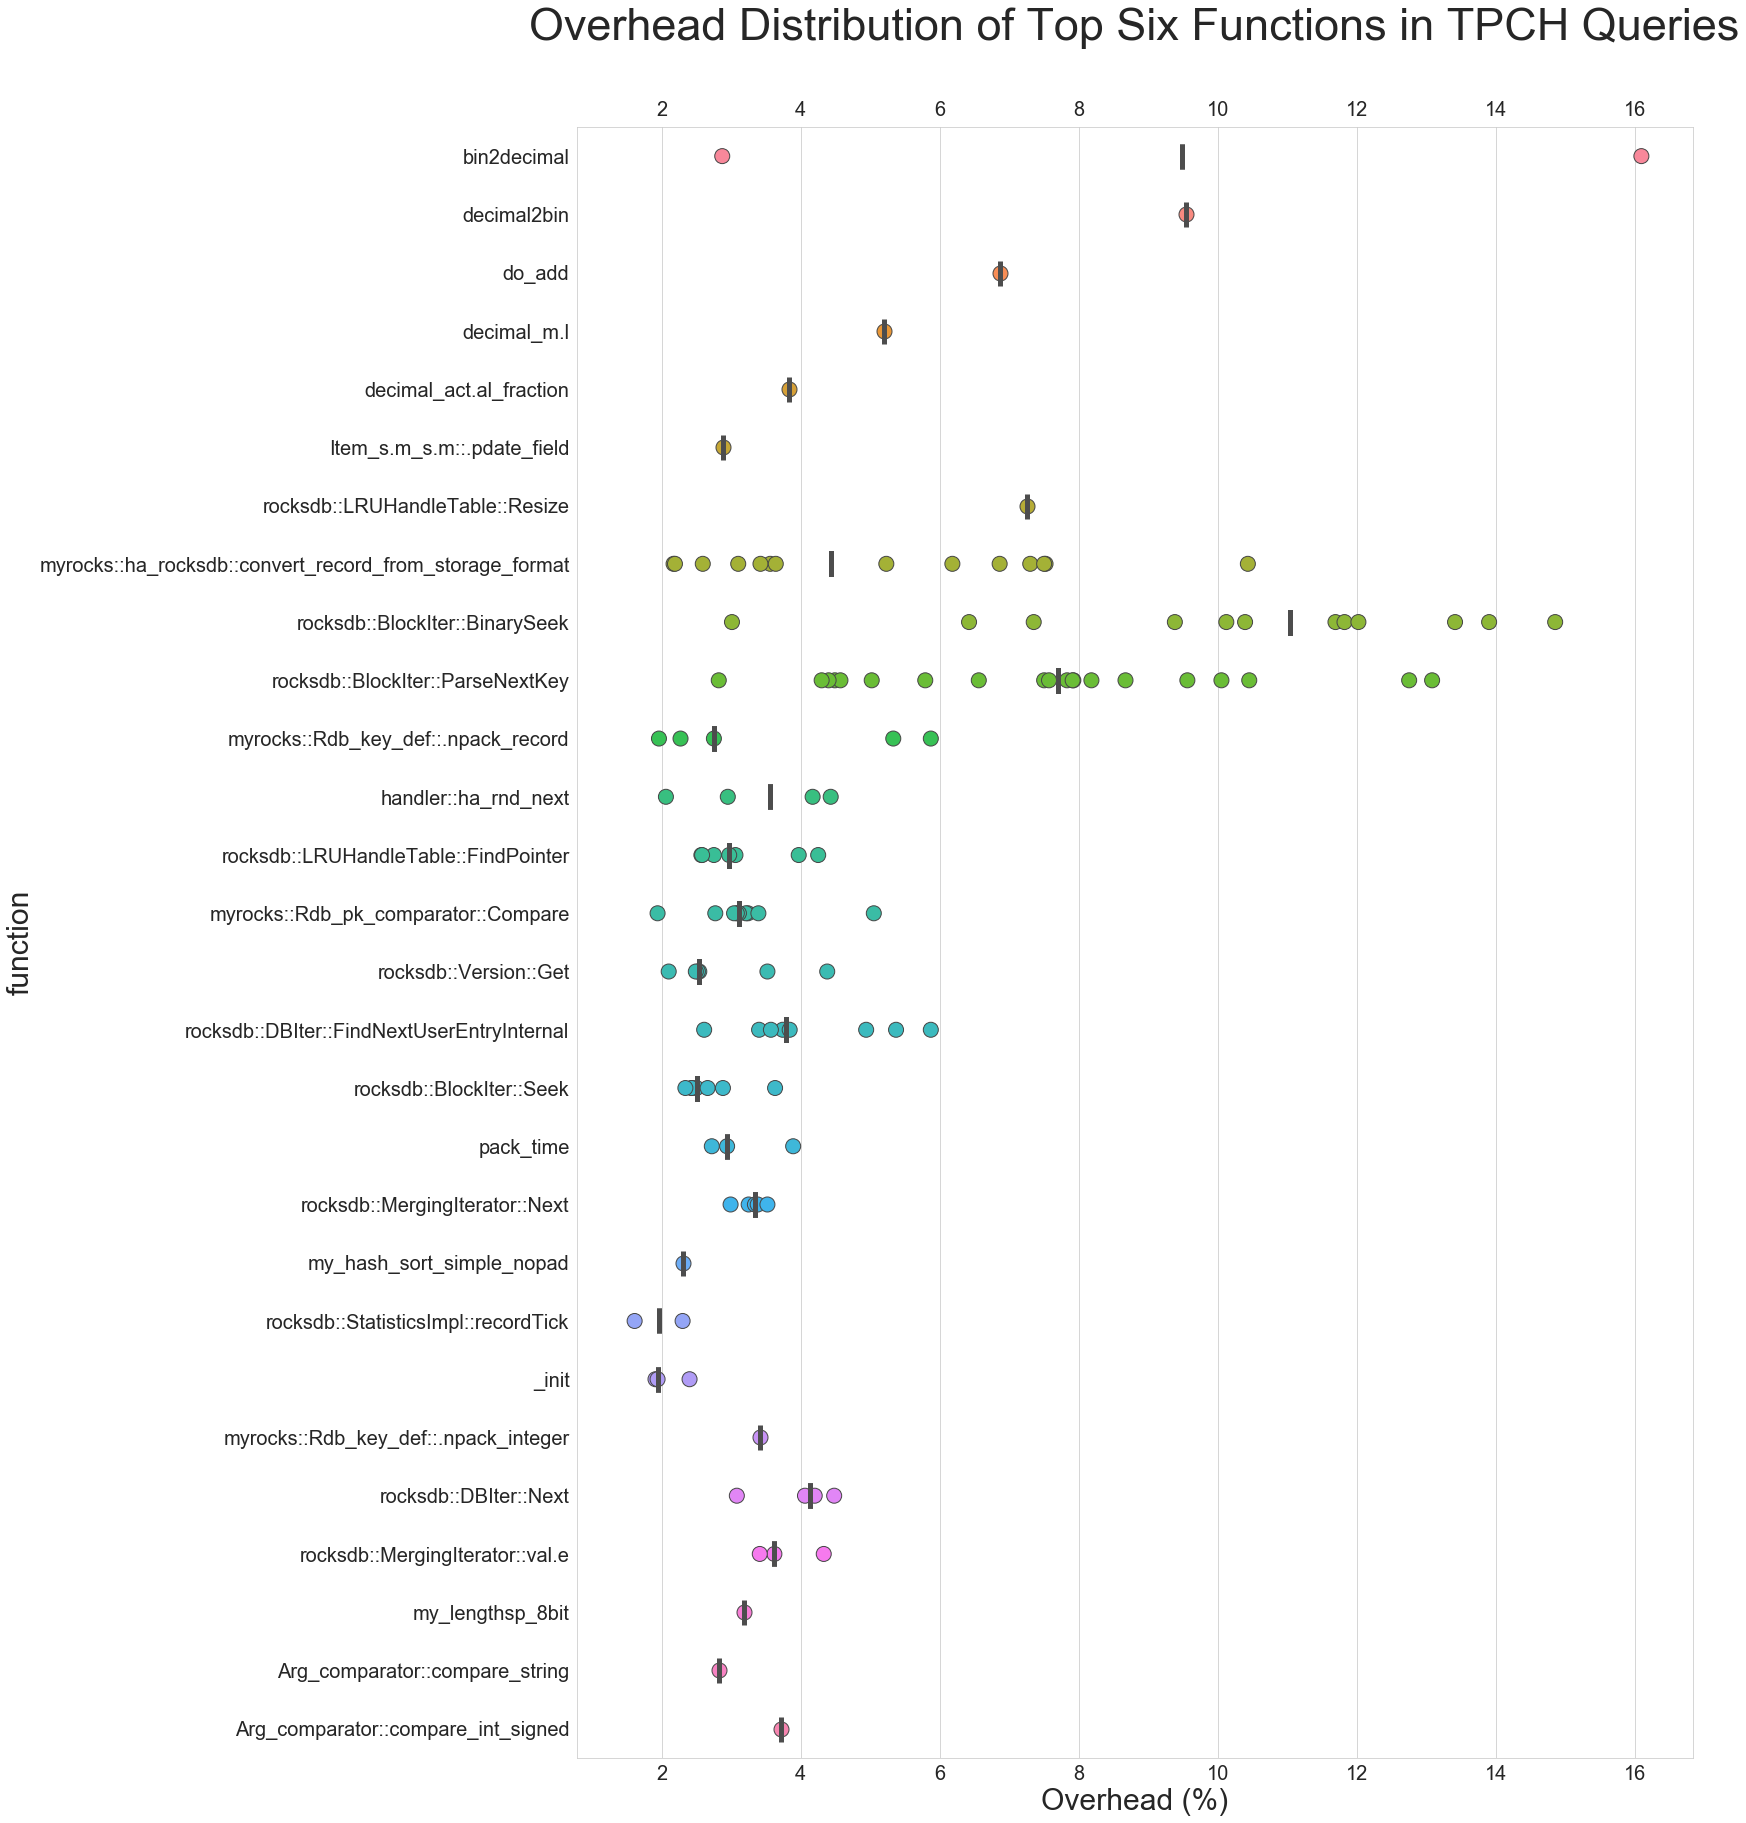

In [12]:
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(111)

#ax = sns.boxplot(y="function", x="overhead",data=df, showbox=False,)

ax = sns.stripplot(y="function", x="overhead",data=df,size=15,linewidth=1, jitter=False )

ax = sns.stripplot(y="function", x="group_median",data=df, jitter=False,
                   size=25, linewidth=5, marker="|",color=".3" )


ax.set_xlabel(xlabel='Overhead (%)',fontsize=30)
ax.set_ylabel(ylabel='function',fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20,labeltop=True)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_title('Overhead Distribution of Top Six Functions in TPCH Queries', fontsize=45, y=1.05)



fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)

ax = sns.boxplot(y="function", x="overhead",data=df)

ax = sns.stripplot(y="function", x="overhead",data=df,size=8, jitter=0.2,linewidth=1)


ax.set_xlabel(xlabel='Overhead (%)',fontsize=30)
ax.set_ylabel(ylabel='function',fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20,labeltop=True)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_title('Overhead Distribution of Top Six Functions in TPCH Queries', fontsize=45, y=1.05)
